In [14]:
import numpy as np
import cv2  as cv
import matplotlib.pyplot as plt
import pytesseract

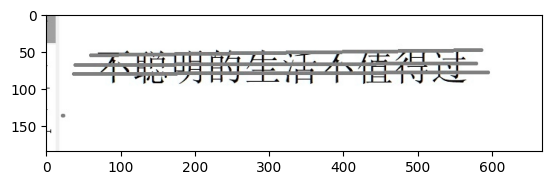

In [15]:
input_image = cv.imread('image1.jpg')
plt.imshow(input_image)

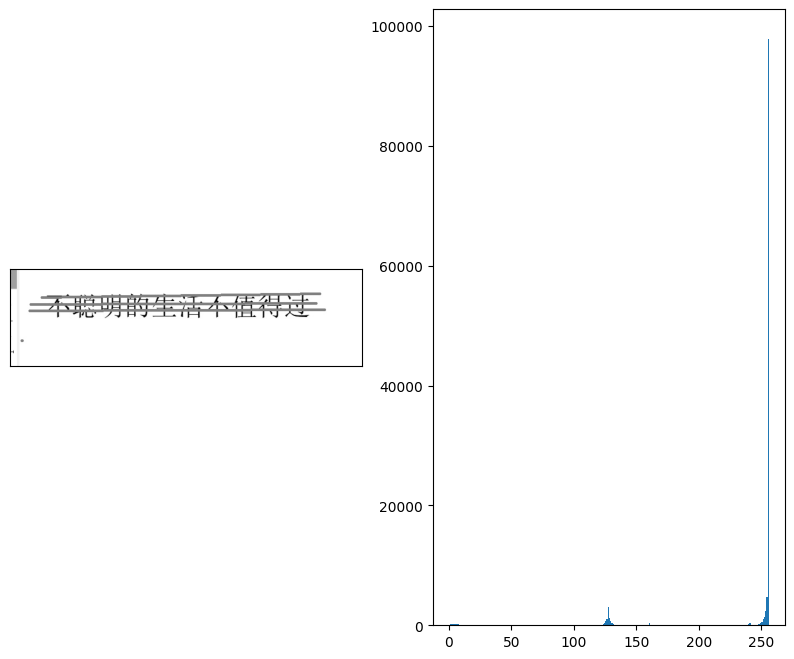

In [16]:
image = input_image

gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)


channels = [0]
histSize = [256]
range = [0, 256]

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.hist(gray_image.reshape(-1), 256, range)
plt.show()


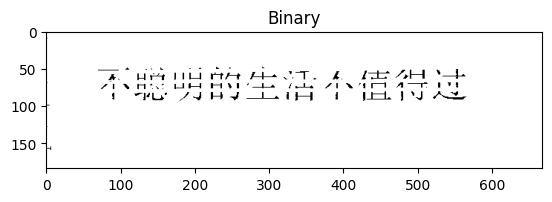

In [17]:
threshold = 115
image = gray_image

ret, binary_image = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
plt.title("Binary")
plt.imshow(binary_image,"gray")


In [18]:
cv.imwrite("binary_image.jpg", binary_image)

True

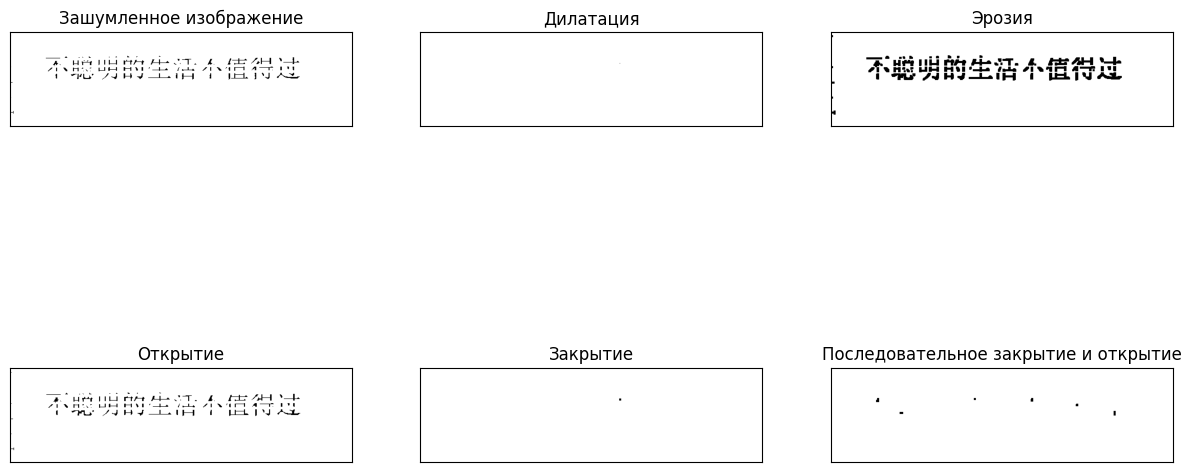

In [19]:
image = binary_image

kernel = np.ones((4, 4), np.uint8)
dilation = cv.dilate(image, kernel, iterations=1)
erosion = cv.erode(image, kernel, iterations=1)
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(2, 3)

titles = ['Зашумленное изображение', 'Дилатация', 'Эрозия', 'Открытие', 'Закрытие',
          'Последовательное закрытие и открытие']
outImages = [image, dilation, erosion, opening, closing, closeAndOpen]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

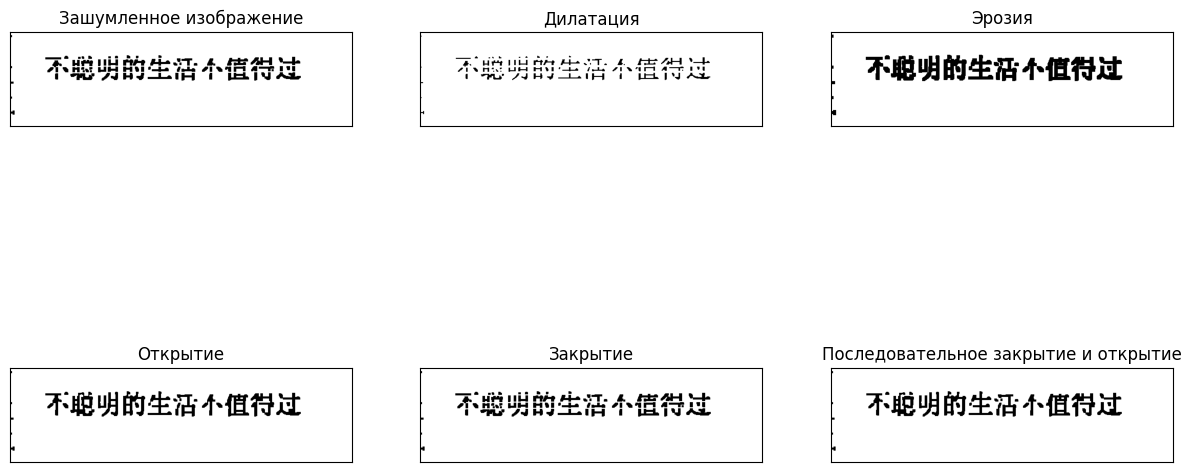

In [20]:
image = erosion

kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(image, kernel, iterations=1)
erosion = cv.erode(image, kernel, iterations=1)
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(2, 3)

titles = ['Зашумленное изображение', 'Дилатация', 'Эрозия', 'Открытие', 'Закрытие',
          'Последовательное закрытие и открытие']
outImages = [image, dilation, erosion, opening, closing, closeAndOpen]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

True

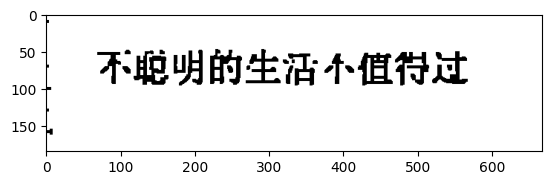

In [21]:
plt.imshow(closeAndOpen,"gray")
cv.imwrite("result.jpg", closeAndOpen)

In [26]:
# don't work
lang={"Bulgarian":"bg",
"Bengali":"bn",
"Catalan":"ca",
"Chinese Simplified":"zh-CN",
"Chinese Traditional":"zh-TW",
"Croatian":"hr",
"Czech":"cs",
"Danish":"da",
"Dutch":"nl",
"English":"en",
"Estonian":"et",
"Filipino":"tl",
"Finnish":"fi",
"French":"fr",
"Galician":"gl",
"German":"de",
"Gujarati":"gu",
"Greek":"el",
"Hebrew":"iw",
"Hindi":"hi",
"Hungarian":"hu",
"Icelandic":"is",
"Indonesian":"id",
"Irish":"ga",
"Italian":"it",
"Japanese":"ja",
"Korean":"ko",
"Kannada":"kn",
"Latvian":"lv",
"Lithuanian":"lt",
"Macedonian":"mk",
"Malay":"ms",
"Maltese":"mt",
"Norwegian":"no",
"Persian":"fa",
"Polish":"pl",
"Portuguese":"pt",
"Romanian":"ro",
"Russian":"ru",
"Serbian":"sr",
"Slovak":"sk",
"Slovenian":"sl",
"Spanish":"es",
"Swahili":"sw",
"Swedish":"sv",
"Tamil":"ta",
"Telugu":"te",
"Thai":"th",
"Turkish":"tr",
"Ukrainian":"uk",
"Vietnamese":"vi",
"Welsh":"cy",
"Yiddish":"yi"}


from PIL import Image
import pytesseract
from googletrans import Translator
translator = Translator()
im = Image.open("result.jpg")
text = pytesseract.image_to_string(im)
print("Image Text contains: %s", text)

text=(text.strip()).lower()
text=text.replace("\n", " ")
text=text.replace("  ", " ")
#print(text)
lan="zh-TW"
if text is not None and lan in lang.keys():
    res=translator.translate(text, dest=lang[lan])
    print((res.text))
print("Done")

Image Text contains: %s HU ETS METS aL

Done
